### Web Scraping

- extracting HTML code of a webpage

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
!pip install spacy
!python -m spacy download en_core_web_md
import spacy

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [2]:
response1 = requests.get('https://www.lyrics.com/artist/Queen/5205')
soup1 = BeautifulSoup(response1.text)

In [3]:
#pattern='lyric[^"]+'
#re.findall(pattern, links) 

In [4]:
import re
links_queen = [i.get('href') for i in soup1.find(class_='tdata-ext').find_all('a')]
links_queen = ['https://www.lyrics.com'+i for i in links_queen]
links_queen = [a for a in links_queen if not re.search('album', a)]
links_queen[0:3]

['https://www.lyrics.com/lyric/36577956/Queen/Innuendo',
 'https://www.lyrics.com/lyric/36577943/Queen/You+Don%27t+Fool+Me',
 'https://www.lyrics.com/lyric/36577933/Queen/Driven+by+You']

In [5]:
texts_queen = []
for i in links_queen: 
    response_q = requests.get(i)
    soup_q = BeautifulSoup(response_q.text)
    text_q=soup_q.find(id ='lyric-body-text').text
    texts_queen.append((text_q))

KeyboardInterrupt: 

In [1]:
def cleaning_function(text):
    clean_text = []
    model = spacy.load('en_core_web_md') 
    token_text = model(text)
    for word in token_text:
        if not word.is_stop and not word.is_punct and word.is_alpha:
            clean_text.append(word.lemma_)
    return ' '.join(clean_text)

In [2]:
texts_queen_cl = []
for i in texts_queen:
    i = cleaning_function(i)
    texts_queen_cl.append(i)

NameError: name 'texts_queen' is not defined

In [ ]:
texts_queen_cl=pd.DataFrame(texts_queen_cl)
texts_queen_cl.to_csv("texts_queen")
texts_queen_cl

In [ ]:
response2 = requests.get('https://www.lyrics.com/artist/The-Rolling-Stones/5298')
soup2 = BeautifulSoup(response2.text)

import re
links_rollingst = [i.get('href') for i in soup2.find(class_='tdata-ext').find_all('a')]
links_rollingst = ['https://www.lyrics.com'+i for i in links_rollingst]
links_rollingst = [a for a in links_rollingst if not re.search('album', a)]
links_rollingst

texts_rollingst = []
for i in links_rollingst: 
    response_r = requests.get(i)
    soup_r = BeautifulSoup(response_r.text)
    text_r=soup_r.find(id ='lyric-body-text').text
    texts_rollingst.append((text_r))


In [ ]:
texts_rollingst_cl = []
for i in texts_rollingst:
    i = cleaning_function(i)
    texts_rollingst_cl.append(i)

In [ ]:
texts_rollingst_cl=pd.DataFrame(texts_rollingst_cl)
texts_rollingst_cl.to_csv('texts_rollingst')

In [4]:
import pandas as pd
df_q=pd.read_csv('texts_q', index_col=0)
df_q.rename(columns={'0':'SONGS'}, inplace=True)
df_q['ARTIST_Queen/Rollingstones_0/1'] = '0'
df_q.head(3)

,SONGS,ARTIST_Queen/Rollingstones_0/1
0,One two three four\n\nOoh ooh\n\nWhile the sun...,0
1,"Oh oh\n\nYou don't fool me, you don't fool me\...",0
2,Woh everything I do I do for you \nOw\nOh yeah...,0


In [5]:
df_rs=pd.read_csv('texts_rs', index_col=0)
df_rs.rename(columns={'0':'SONGS'}, inplace=True)
df_rs['ARTIST_Queen/Rollingstones_0/1'] = '1'
df_rs.head(3)

,SONGS,ARTIST_Queen/Rollingstones_0/1
0,If you start me up\nIf you start me up I'll ne...,1
1,I had a dream last night\nThat I was piloting ...,1
2,Gold Coast slave ship bound for cotton fields\...,1


In [6]:
df = df_q.append(df_rs)
df.to_csv('songs_qrs')
df

,SONGS,ARTIST_Queen/Rollingstones_0/1
0,One two three four\n\nOoh ooh\n\nWhile the sun...,0
1,"Oh oh\n\nYou don't fool me, you don't fool me\...",0
2,Woh everything I do I do for you \nOw\nOh yeah...,0
3,"Can anybody find me somebody to love?\n\nOoh, ...",0
4,Yesterday my life was in ruin\nNow today I kno...,0
...,...,...
5455,Did you hear about the midnight rambler \nEver...,1
5456,I got the lumps in my throat\nWhen I saw her c...,1
5457,"Mama says yes, Papa says no\nMake up your mind...",1
5458,I was born in a cross-fire hurricane\nAnd I ho...,1


### WordCloud

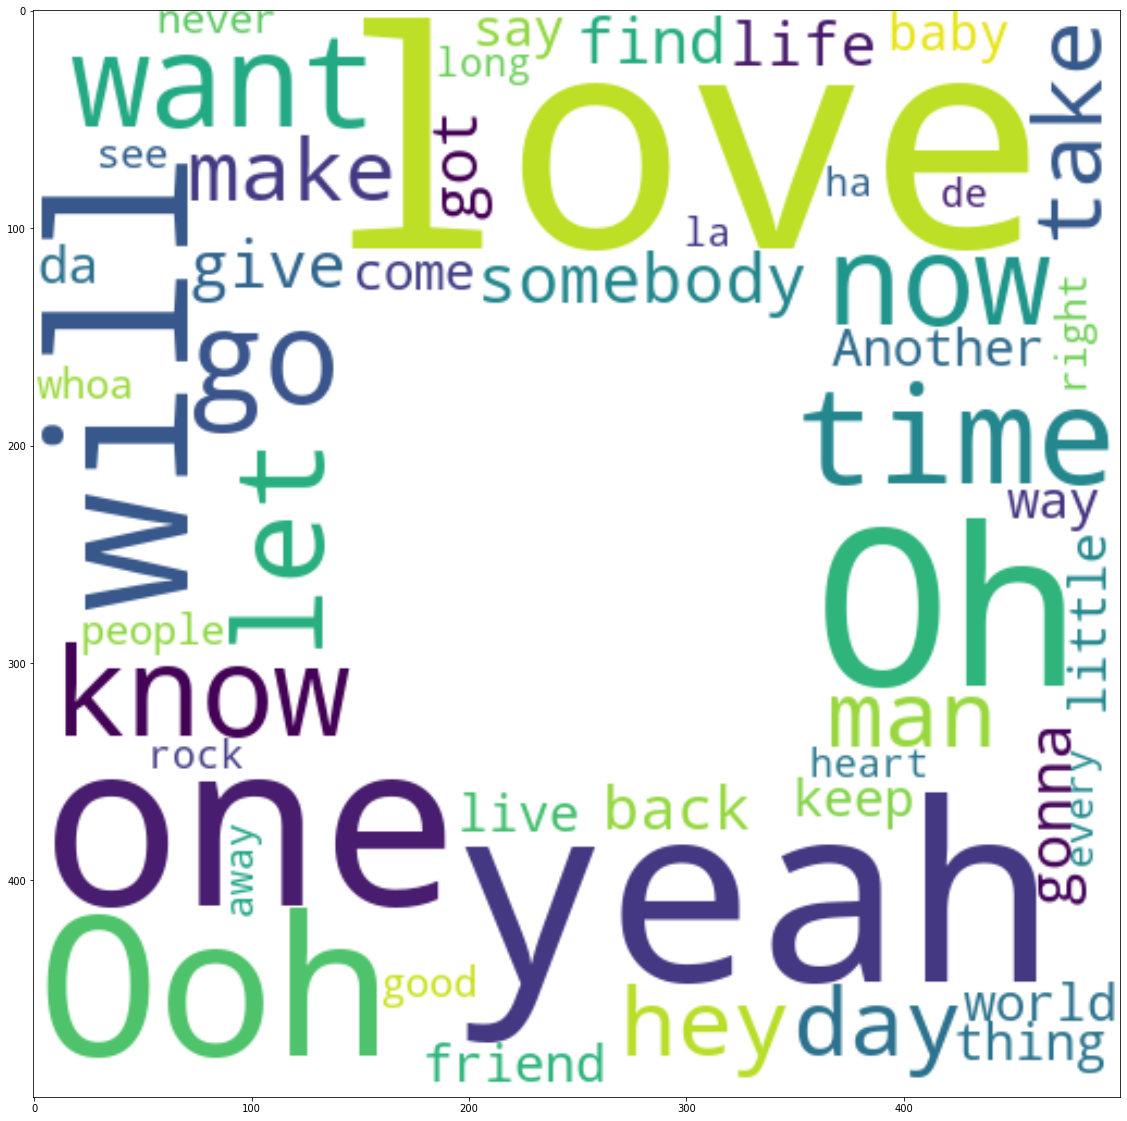

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import wordcloud
from PIL import Image


text = df_q.SONGS.str.cat()
mask = np.zeros((500, 500, 3), np.uint8)
mask[150:350,150:350,:] = 255  # masked out area
#mask = np.array(Image.open('circle.png'))

cloud = wordcloud.WordCloud(background_color="white",
                max_words=50,
                mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(text)
                # stop words are removed!

plt.figure(figsize = (20,20))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('cloud.png')
plt.show()

### Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus= df['songs']
corpus

In [ ]:
cv = CountVectorizer(stop_words='english') # word combinations: 'ngram_range=(1,2)'
cv.fit(corpus)

In [ ]:
vec_corpus = cv.transform(corpus)
vec_corpus

### Sparse Matrix

In [ ]:
vec_corpus.todense()

In [ ]:
df = pd.DataFrame(vec_corpus.todense(), columns=cv.get_feature_names())
df.head(3)

### Tf-Idf Transformer: scale words based on their uniqueness

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.feature_extraction.text import TfidfVectorizer # This does both steps (count vectorizer and tfidfTransfomer) in one

In [ ]:
tf = TfidfTransformer()
tf_corpus = tf.fit_transform(vec_corpus)
tf_corpus

In [ ]:
df2 = pd.DataFrame(tf_corpus.todense().round(2), columns=cv.get_feature_names())
df2